In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
teja=pd.read_csv("Ecommerce - UK Retailer.csv",encoding= 'unicode_escape')

In [3]:
teja.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


 ## Cleaning unwanted data

In [4]:
teja[teja.isnull().any(axis="columns")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [5]:
teja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
null_col=teja[teja.isnull().any(axis="columns")].index

In [7]:
teja.drop(null_col,inplace=True)

In [8]:
teja.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [9]:
teja["InvoiceDate"]=pd.to_datetime(teja["InvoiceDate"])
teja["UnitPrice"]=teja["UnitPrice"].astype('float')
teja["CustomerID"]=teja["CustomerID"].astype('int')

In [10]:
teja.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


In [11]:
neg_quantity=teja[teja['Quantity']<=0].index

In [12]:
teja.drop(neg_quantity,inplace=True)

In [13]:
teja

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


## 1. Perform Basic EDA

### a. Boxplot – All Numeric Variables 


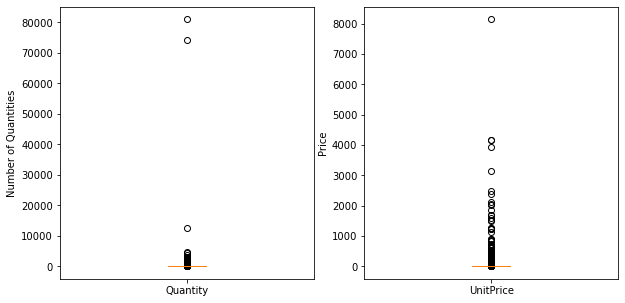

In [14]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].boxplot(teja["Quantity"])
ax[0].set_xticklabels(["Quantity"])
ax[0].set_ylabel('Number of Quantities')
ax[1].boxplot(teja["UnitPrice"])
ax[1].set_xticklabels(["UnitPrice"])
ax[1].set_ylabel("Price")
plt.show()

### b. Histogram – All Numeric Variables 

In [15]:
teja1=teja[teja["Quantity"]<10000]
teja2=teja1[teja1["UnitPrice"]<3000]

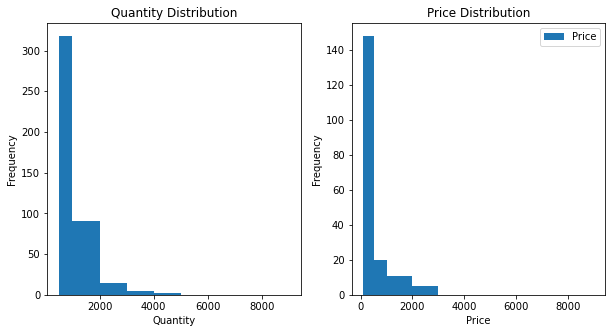

In [16]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(teja2["Quantity"],label="Quantity",bins=[500,1000,2000,3000,4000,5000,6000,7000,8000,9000])
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel('Quantity')
ax[0].set_title("Quantity Distribution")
ax[1].hist(teja2["UnitPrice"],label="Price",bins=[100,500,1000,2000,3000,4000,5000,6000,7000,8000,9000])
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel('Price')
ax[1].set_title("Price Distribution")
plt.legend()
plt.show()

### c. Distribution Plot – All Numeric Variables 


In [17]:
teja3=teja2[teja["Quantity"]<2000]

C:\Users\tejat\AppData\Local\Temp/ipykernel_12276/2772338799.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  teja3=teja2[teja["Quantity"]<2000]


C:\Users\tejat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


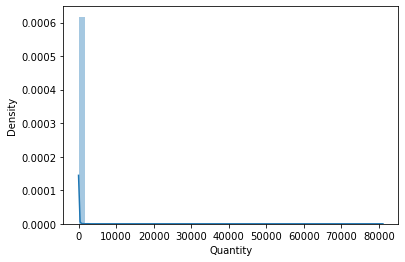

In [18]:
sns.distplot(teja["Quantity"])
plt.show()

### d. Aggregation for all numerical Columns 


In [19]:
teja.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


### e. Unique Values across all columns 


In [20]:
teja.nunique()

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
dtype: int64

### f. Duplicate values across all columns 

In [21]:
teja[teja.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446,United Kingdom


### g. Correlation – Heatmap - All Numeric Variables 


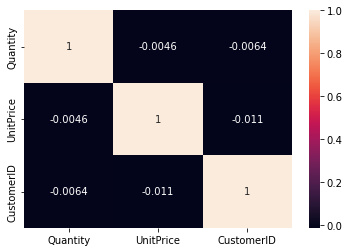

In [22]:
sns.heatmap(teja.corr(),annot=True)
plt.show()

### h. Regression Plot - All Numeric Variables 


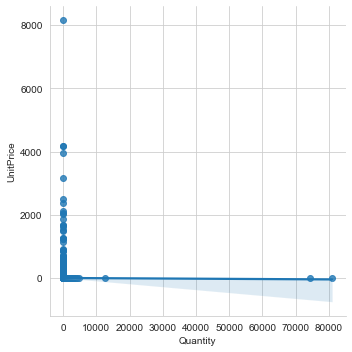

In [23]:
sns.set_style('whitegrid')
sns.lmplot(x ='Quantity', y ='UnitPrice', data = teja)
plt.show()

### i. Bar Plot – Every Categorical Variable vs every Numerical Variable 

In [24]:
teja=teja.groupby(['Country']).agg({'Quantity':"count"})

In [25]:
teja

,Quantity
Country,
Australia,1185
Austria,398
Bahrain,17
Belgium,2031
Brazil,32
Canada,151
Channel Islands,748
Cyprus,614
Czech Republic,25


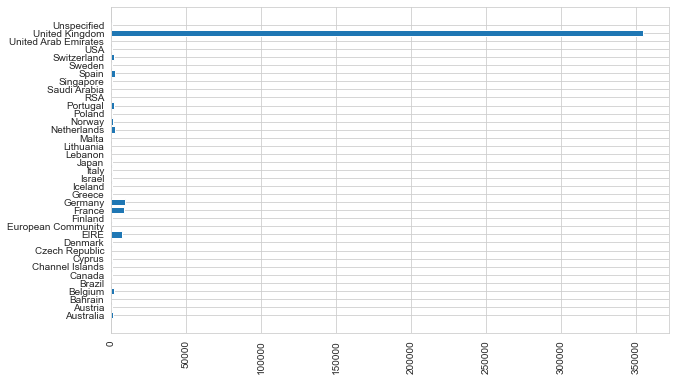

In [26]:
plt.subplots(figsize=(10,6))
plt.barh(teja.index,teja['Quantity'])
plt.xticks(rotation="vertical")
plt.show()

In [31]:
teja5=teja3.groupby(['Country']).agg({'UnitPrice':"sum"})

In [32]:
teja5

,UnitPrice
Country,
Australia,3612.500
Austria,1693.900
Bahrain,78.950
Belgium,7372.850
Brazil,142.600
Canada,910.580
Channel Islands,3389.650
Cyprus,3506.180
Czech Republic,78.270


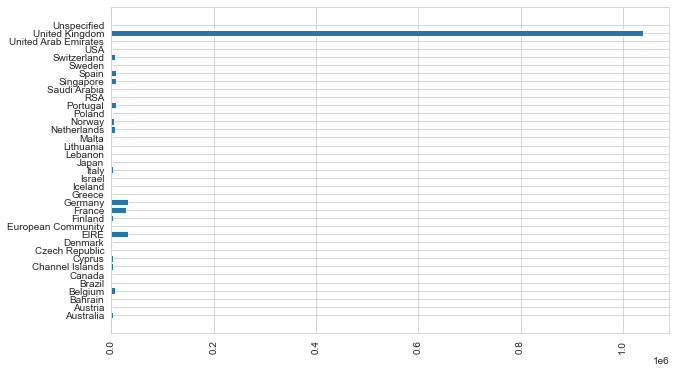

In [33]:
plt.subplots(figsize=(10,6))
plt.barh(teja5.index,teja5['UnitPrice'])
plt.xticks(rotation="vertical")
plt.show()

### j. Pair plot - All Numeric Variables 

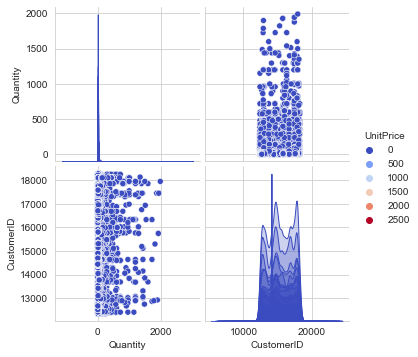

In [30]:
sns.pairplot(teja3 , hue = 'UnitPrice' , palette = 'coolwarm')
plt.show()

### k. Line chart to show the trend of data - All Numeric/Date Variables 



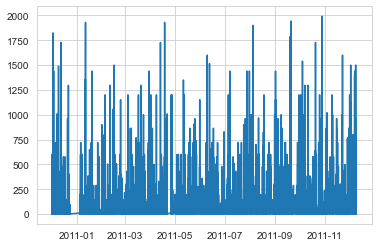

In [34]:
plt.plot(teja3["InvoiceDate"],teja3["Quantity"],linestyle ='solid')
plt.show()

### l. Plot the skewness - All Numeric Variables

C:\Users\tejat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


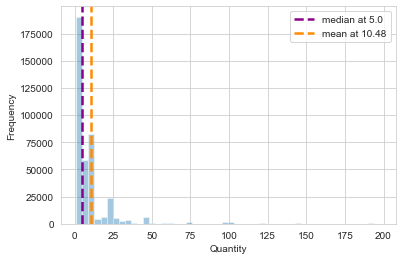

In [39]:
teja4=teja3[teja3["Quantity"]<200]
sns.distplot(teja4["Quantity"],kde=False)
plt.ylabel("Frequency")
median_price = round(teja4["Quantity"].median(), 2)
mean_price = round(teja4["Quantity"].mean(), 2)
names = ["median", "mean"]
colors = ['darkmagenta', 'darkorange']
measurements = [median_price, mean_price]
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

plt.show()

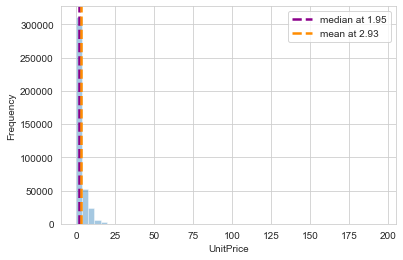

In [40]:
teja4=teja3[teja3["UnitPrice"]<200]
sns.distplot(teja4["UnitPrice"],kde=False)
plt.ylabel("Frequency")
median_price = round(teja4["UnitPrice"].median(), 2)
mean_price = round(teja4["UnitPrice"].mean(), 2)
names = ["median", "mean"]
colors = ['darkmagenta', 'darkorange']
measurements = [median_price, mean_price]
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

plt.show()

## 2. Check for missing values in all columns and replace them with the appropriate metric

In [41]:
teja_new=pd.read_csv("Ecommerce - UK Retailer.csv",encoding= 'unicode_escape')

In [42]:
teja_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [43]:
teja_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [44]:
teja_new.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [46]:
teja_new["CustomerID"]=teja_new["CustomerID"].fillna(teja_new["CustomerID"].mode()[0])

In [47]:
teja_new.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [48]:
teja_new["Description"]=teja_new["Description"].fillna(teja_new["Description"].mode()[0])

In [49]:
teja_new.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

C:\Users\tejat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


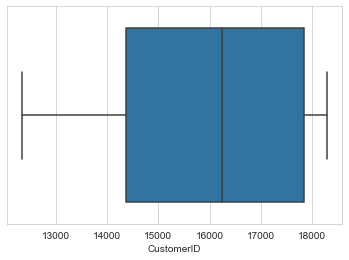

In [50]:
sns.boxplot(teja_new["CustomerID"])
plt.show()

 ## 3.Remove duplicate rows

In [63]:
teja_new.drop_duplicates(inplace=True)

In [64]:
teja_new[teja_new.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


 ## 4. Remove rows which have negative values in Quantity column

In [65]:
index1=teja_new[teja_new["Quantity"]<0].index

In [71]:
teja_new.drop(index1,inplace=True)

## 5. Add the columns - Month, Day and Hour for the invoice 


In [72]:
teja_new['InvoiceDate'] = teja_new['InvoiceDate'].astype('datetime64[ns]')
teja_new['Year'] = teja_new.InvoiceDate.dt.year
teja_new['Month'] = teja_new.InvoiceDate.dt.month
teja_new['Hour'] = teja_new.InvoiceDate.dt.hour

In [73]:
teja_new['day'] = teja_new['InvoiceDate'].dt.day_name()

In [74]:
teja_new.drop(['day'],axis=1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,12


## 6. How many orders made by the customers? 

In [75]:
teja_new['Quantity'].value_counts().sum()

526054

In [76]:
orders=teja_new.groupby(by=['CustomerID','Country'],sort=True)['InvoiceNo'].count().head()

In [77]:
orders

CustomerID  Country       
12346.0     United Kingdom      1
12347.0     Iceland           182
12348.0     Finland            31
12349.0     Italy              73
12350.0     Norway             17
Name: InvoiceNo, dtype: int64

## 7. TOP 5 customers with higher number of orders

In [78]:
top5=teja_new.groupby(by=['CustomerID'],as_index=False)['Quantity'].sum().head()

In [79]:
top5

,CustomerID,Quantity
0,12346.0,74215
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


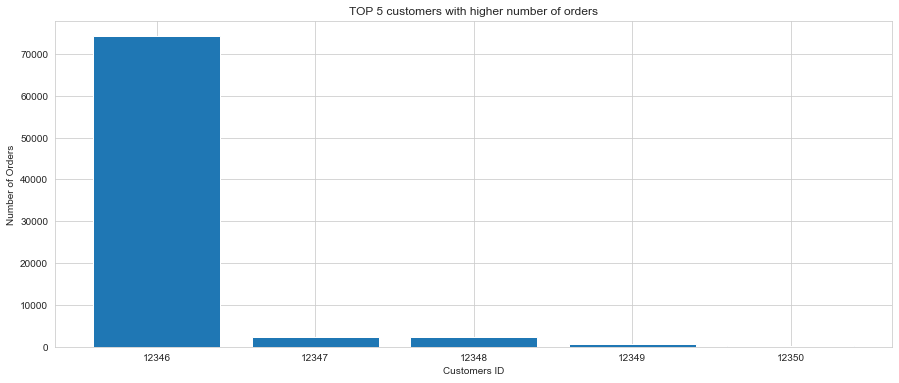

In [80]:
plt.subplots(figsize=(15,6))
plt.bar(top5.CustomerID,top5.Quantity)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('TOP 5 customers with higher number of orders')
plt.show()

## 8. How much money spent by the customers? 

In [81]:
teja_new["Revenue"]=teja_new["Quantity"]*teja_new["UnitPrice"]

In [82]:
teja_new["Revenue"]

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Revenue, Length: 526054, dtype: float64

In [83]:
money_spent = teja_new.groupby(by=['CustomerID','Country']).agg({"Revenue":sum})

In [84]:
money_spent.head()

,,Revenue
CustomerID,Country,
12346.0,United Kingdom,77183.60
12347.0,Iceland,4310.00
12348.0,Finland,1797.24
12349.0,Italy,1757.55
12350.0,Norway,334.40


 ## 9. TOP 5 customers with highest money spent 

In [85]:
m =money_spent.sort_values(by='Revenue', ascending=False).head()
m

,,Revenue
CustomerID,Country,
17841.0,United Kingdom,1735115.17
14646.0,Netherlands,280206.02
18102.0,United Kingdom,259657.30
17450.0,United Kingdom,194390.79
16446.0,United Kingdom,168472.50


## 10. How many orders per month? 

In [86]:
orders_permonth=teja_new.groupby(teja_new["Month"]).agg({"InvoiceNo":"count"})

In [88]:
orders_permonth

,InvoiceNo
Month,
1,34104
2,26961
3,35609
4,28957
5,36044
6,35793
7,38466
8,34347
9,48962


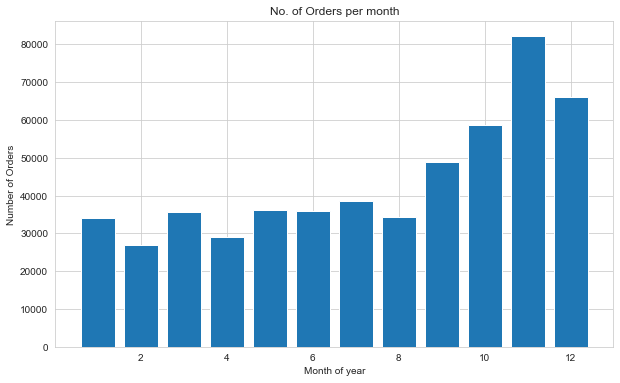

In [89]:
plt.subplots(figsize=(10,6))
plt.bar(orders_permonth.index,orders_permonth.InvoiceNo)
plt.xlabel('Month of year')
plt.ylabel('Number of Orders')
plt.title('No. of Orders per month')
plt.show()

## 11. How many orders per day? 

In [90]:
orders_perday=teja_new.groupby(teja_new["day"]).agg({"InvoiceNo":"count"})

In [91]:
orders_perday=orders_perday.sort_values('InvoiceNo',ascending=False)

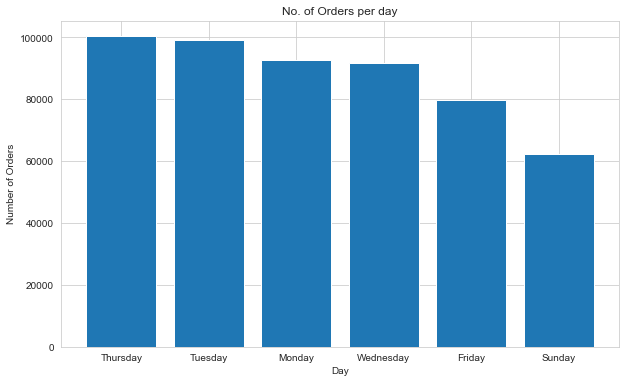

In [92]:
plt.subplots(figsize=(10,6))
plt.bar(orders_perday.index,orders_perday.InvoiceNo)
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.title('No. of Orders per day')
plt.show()

 ## 12. How many orders per hour? 

In [93]:
teja_new['Hour']=teja_new['InvoiceDate'].dt.hour


In [94]:
teja_new['Hour']

0          8
1          8
2          8
3          8
4          8
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: Hour, Length: 526054, dtype: int64

In [95]:
orders_perhour=teja_new.groupby(teja_new["Hour"]).agg({"InvoiceNo":"count"})

In [96]:
orders_perhour

,InvoiceNo
Hour,
6,1
7,379
8,8802
9,33738
10,47670
11,55592
12,76096
13,70067
14,65384


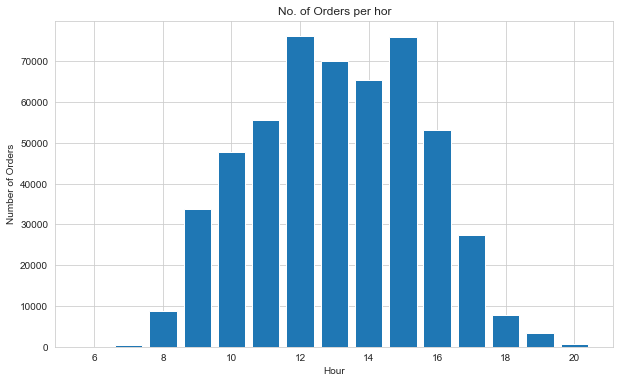

In [97]:
plt.subplots(figsize=(10,6))
plt.bar(orders_perhour.index,orders_perhour.InvoiceNo)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('No. of Orders per hor')
plt.show()

## 13. How many orders for each country? 


In [100]:
orders_percountry=teja_new.groupby(teja_new["Country"]).agg({"InvoiceNo":"count"})

In [101]:
orders_percountry

,InvoiceNo
Country,
Australia,1184
Austria,398
Bahrain,18
Belgium,2031
Brazil,32
Canada,151
Channel Islands,747
Cyprus,603
Czech Republic,25


## 14. Orders trend across months

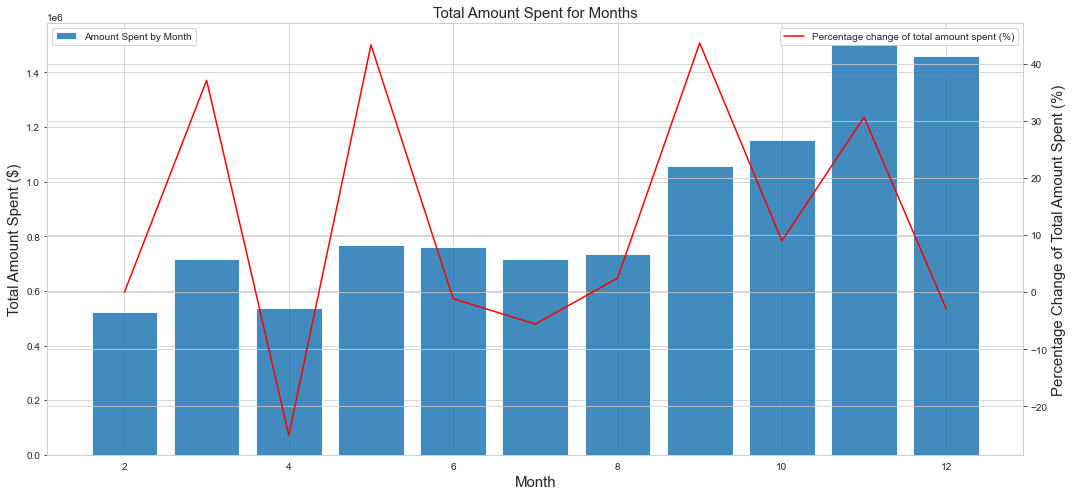

In [102]:
# trend plot
fig = plt.figure(figsize=(15, 7))
x1 = fig.add_subplot(111)

x1.set_xlabel('Month',fontsize=15)
x1.set_ylabel('Total Amount Spent ($)',fontsize=15)
x1.set_title('Total Amount Spent for Months',fontsize=15)

x1.bar(teja_new.groupby(by=['Month'])['Revenue'].sum().index.tolist()[1:],
        teja_new.groupby(by=['Month'])['Revenue'].sum()[1:],
        alpha=0.85,#If you want to make the graph plot more transparent, then you can make alpha less than 1, such as 0.5 or 0.25.
        label='Amount Spent by Month')

x2 = x1.twinx()# tread line

x2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)

#pct_change()Percentage change between the current and a prior element.
x2.plot(teja_new.groupby(by=['Month'])['Revenue'].sum().index.tolist()[1:], 
         teja_new.groupby(by=['Month'])['Revenue'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='red')

x1.legend(loc='upper left')
x2.legend(loc='upper right')

fig.tight_layout()
plt.show()

## 15. How much money spent by each country? 

In [103]:
money_percountry=teja_new.groupby(teja_new["Country"]).agg({"Revenue":"sum"})

In [104]:
money_percountry

,Revenue
Country,
Australia,138453.810
Austria,10198.680
Bahrain,754.140
Belgium,41196.340
Brazil,1143.600
Canada,3666.380
Channel Islands,20440.540
Cyprus,13502.850
Czech Republic,826.740
